In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
from IPython.display import clear_output
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from DataMunging import dataMunging
from IPython.display import display
%matplotlib inline
dm = dataMunging()
fd = dm.hmda_init()
states = fd['State'].unique().tolist()
years = fd['As_of_Year'].unique().tolist()
states.append('All')
states.sort()
years = ['All'] + years


In [2]:
from InteractiveDashboard import *
from IPython.display import clear_output

#### To interact with dashboard, run the jupyter notebook

# DashBoard - Top Competetors by Region and Time

To run the DashBoard, run the **import section** and then run the following command.
```
interact(createCompetitorPlots, States = states, Years = years);
```

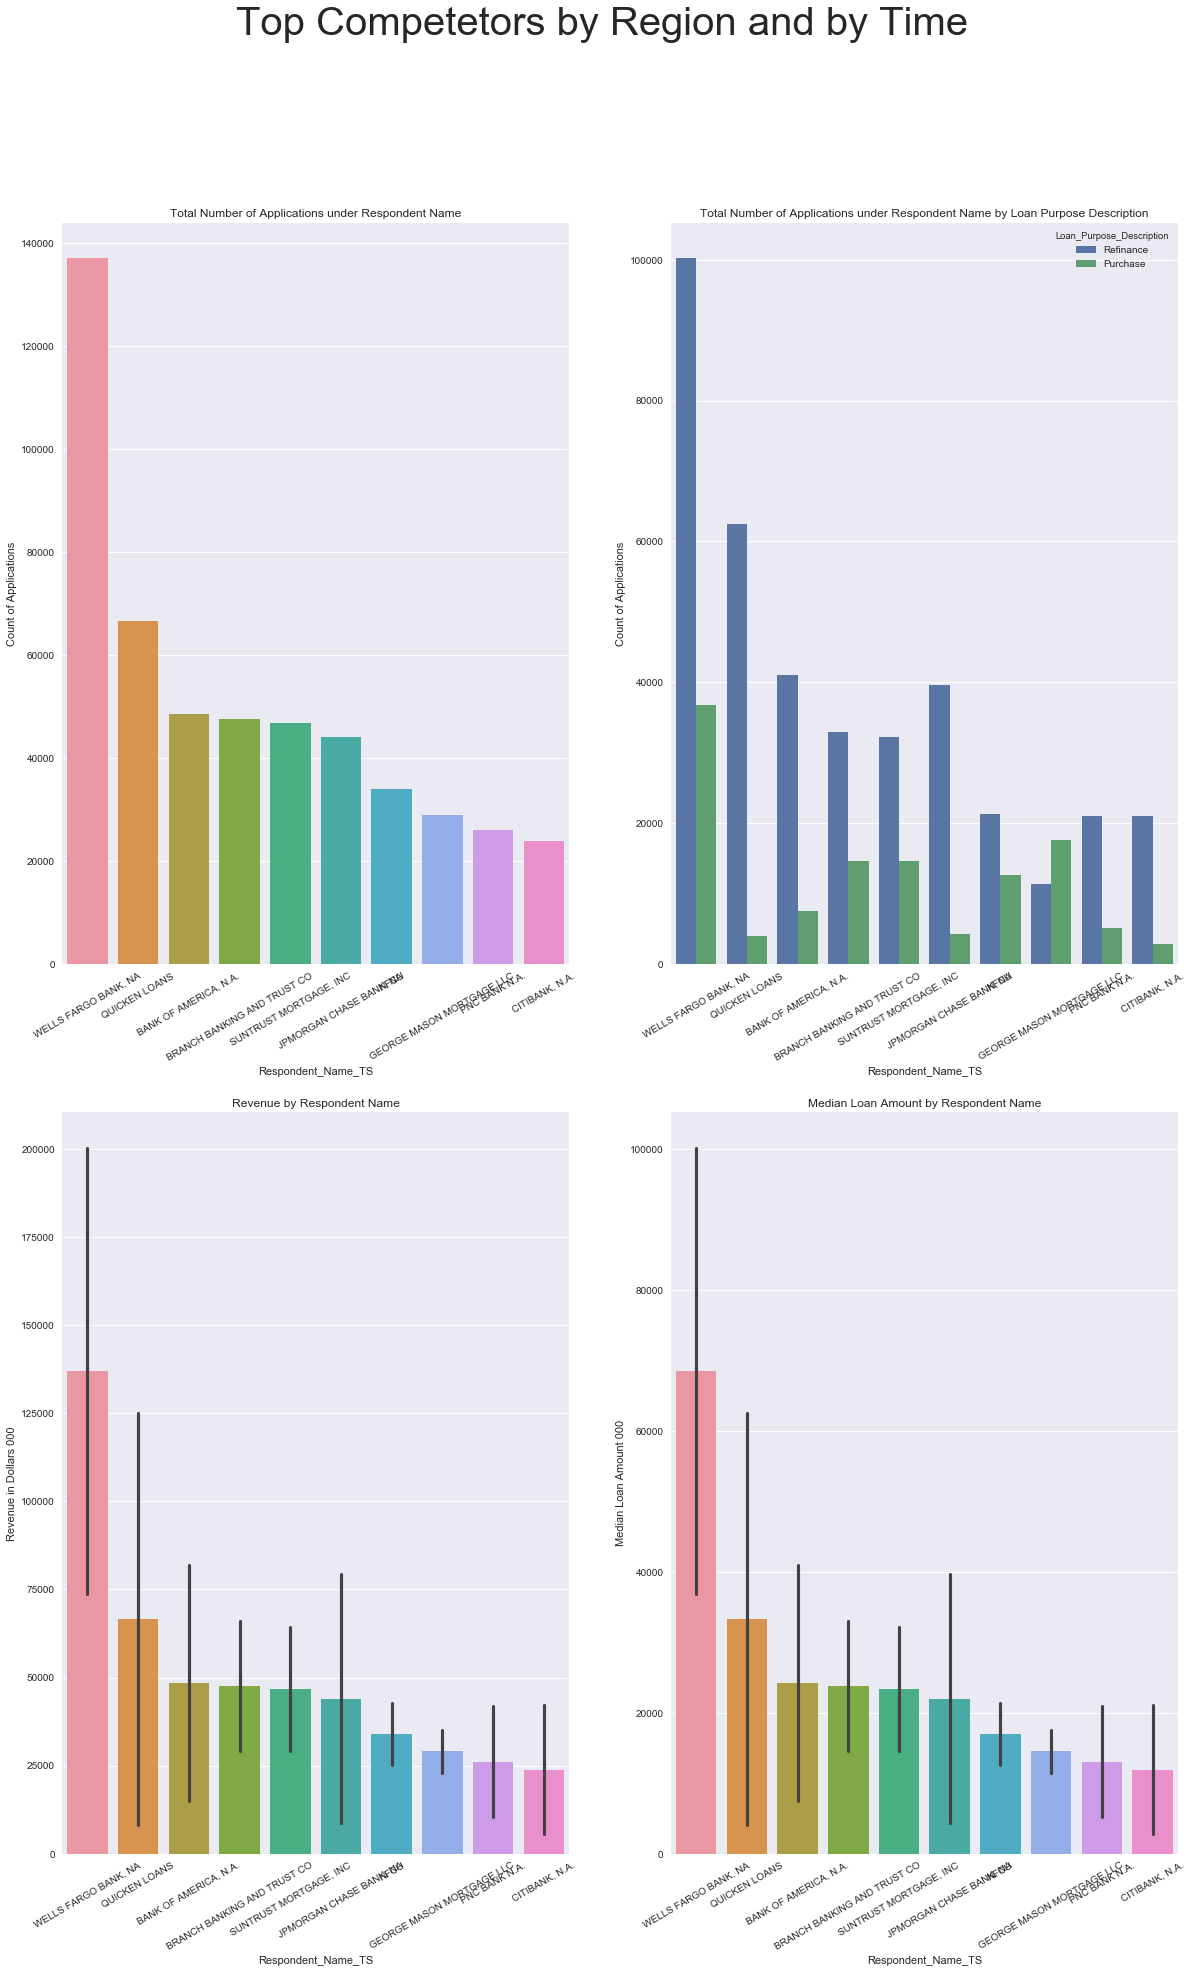

In [3]:
interact(createCompetitorPlots, States = states, Years = years);

# DashBoard - Loan Business By Top Counties and State

To run DashBoard2, run the ***import Section*** and execute the following code:
```
Statesx = widgets.Dropdown(description = 'States', options = states)
Countyx = widgets.Dropdown(description = 'County')
def search_action(change):
    phrase = (change['new'])
    Countyx.options=[]
    if(phrase != 'All'):
        df = fd[fd['State'] == phrase]['County_Name'].unique()
        df = df[~pd.isnull(df)].tolist()
        Countyx.options = ['All'] + df
    
    
    
Statesx.observe(search_action, names = 'value')
display(Statesx, Countyx)

def countyS(change):
    clear_output()
    CreatCountyWiseBusinessPlot(Statesx.value, Countyx.value)
    #print(Statesx.value, Countyx.value)
    
Countyx.observe(countyS, names = 'value')
```

** Instructions **  
After Running the code, only the State Field will be populated. The user os suppposed to select the State and after the state is selected, the counties for that state will be populated. 

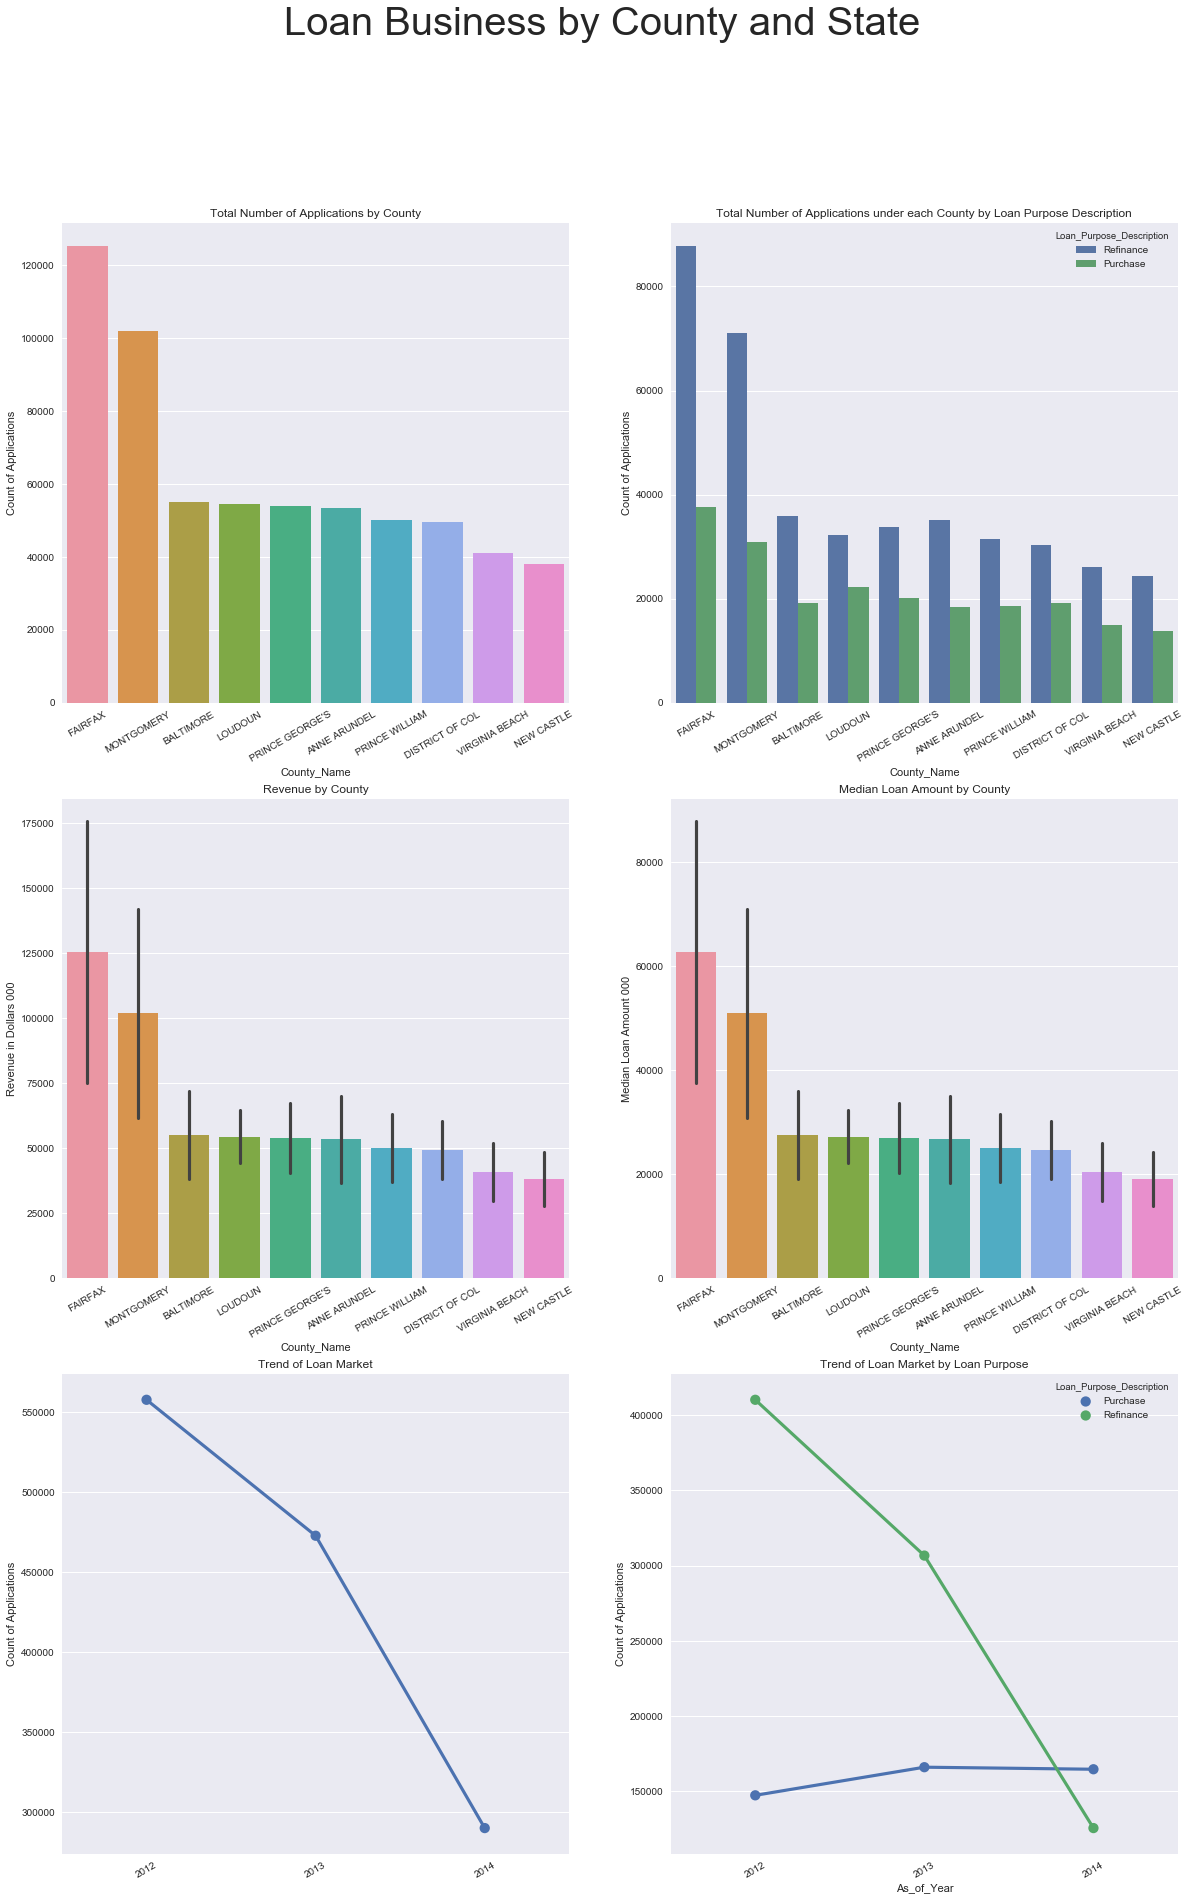

In [4]:
Statesx = widgets.Dropdown(description = 'States', options = states)
Countyx = widgets.Dropdown(description = 'County')
def search_action(change):
    phrase = (change['new'])
    Countyx.options=[]
    if(phrase != 'All'):
        df = fd[fd['State'] == phrase]['County_Name'].unique()
        df = df[~pd.isnull(df)].tolist()
        Countyx.options = ['All'] + df
    else:
        Countyx.options = ['All']
    
    
Statesx.observe(search_action, names = 'value')
display(Statesx, Countyx)

def countyS(change):
    clear_output()
    CreatCountyWiseBusinessPlot(Statesx.value, Countyx.value)
    #print(Statesx.value, Countyx.value)
    
Countyx.observe(countyS, names = 'value')